
<a id="1"></a>
<div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#4CAF50; box-sizing: border-box;">
    <b>🍌 Banana Leaf Disease Classification 🍃</b>
</div>

<p style="text-align:center; font-size:20px; font-family:Serif; margin-top:15px;">
    Detecting diseases in banana leaves using Artificial Intelligence 🌱🧠
</p>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/mZJzgWLT/62.jpg" alt="Healthy Leaf" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Healthy</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/4nRxbZyt/18.jpg" alt="Sigatoka Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Sigatoka</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/m29ccpkC/12.jpg" alt="Cordana Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Cordana</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/BZkNDv5y/1.jpg" alt="Pestalotiopsis Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Pestalotiopsis</p>
    </div>
</div>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-top:20px;">
    <b>Models Used:</b> Transfer Learning with models for classification
</p>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-bottom:20px;">
    <b>Objective:</b> Improve detection of banana leaf diseases for early intervention in agriculture 🍌🌿
</p>


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     BatchNormalization, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [2]:
# Rutas de los conjuntos de datos
train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Parámetros
img_height, img_width = 224, 224 
batch_size = 32

# Aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Sólo reescalar para validación y prueba
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Para evaluar correctamente
)


Found 655 images belonging to 4 classes.
Found 92 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


In [3]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Congelar las capas del modelo base para no entrenarlas nuevamente
base_model.trainable = False

# Crear el modelo secuencial
model = Sequential()

# Añadir el modelo base MobileNetV2
model.add(base_model)

# Añadir capa de pooling global
model.add(GlobalAveragePooling2D())

# Añadir una capa completamente conectada con 512 unidades y activación ReLU
model.add(Dense(512, activation='relu'))

# Añadir Dropout para regularización
model.add(Dropout(0.5))

# Añadir la capa de salida con tantas unidades como clases (4 en este caso)
model.add(Dense(4, activation='softmax'))


In [4]:
# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=1e-04),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 657,924 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history = model.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=25, 
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_steps = valid_generator.samples // batch_size,
                    verbose=1)


c:\Users\emman\OneDrive\Escritorio\Proyecto Copia\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


c:\Users\emman\OneDrive\Escritorio\Proyecto Copia\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
c:\Users\emman\OneDrive\Escritorio\Proyecto Copia\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3511 - loss: 1.6241 - val_accuracy: 0.5938 - val_loss: 0.9337
Epoch 2/25
 1/20 ━━━━━━━━━━━━━━━━━━━━ 12s 674ms/step - accuracy: 0.5312 - loss: 1.0398

C:\Users\emman\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5312 - loss: 1.0398 - val_accuracy: 0.6429 - val_loss: 0.9650
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 831ms/step - accuracy: 0.6432 - loss: 0.8797 - val_accuracy: 0.6719 - val_loss: 0.6741
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8750 - loss: 0.4945 - val_accuracy: 0.7857 - val_loss: 0.5940
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 785ms/step - accuracy: 0.7163 - loss: 0.6462 - val_accuracy: 0.8281 - val_loss: 0.4942
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9062 - loss: 0.4614 - val_accuracy: 0.7143 - val_loss: 0.5243
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 766ms/step - accuracy: 0.8216 - loss: 0.4992 - val_accuracy: 0.8594 - val_loss: 0.4301
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7812 - loss: 0.4842 - val_accuracy: 0.8929 - val_loss: 0.2872
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 765ms/step - accuracy: 0.8378 - loss: 0.4381 - val_accuracy: 0.8125 - val_

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.9285 - loss: 0.2147
Precisión en el conjunto de prueba: 93.12%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step - accuracy: 0.9583 - loss: 0.2499
Precisión en el conjunto de validación: 95.31%


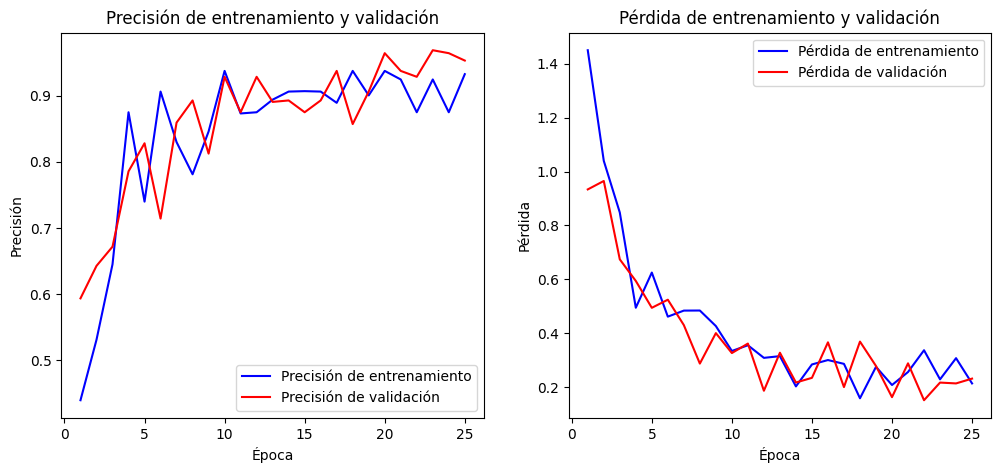

In [6]:
# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Precisión en el conjunto de prueba: {test_accuracy*100:.2f}%')

val_loss, val_accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // batch_size)
print(f'Precisión en el conjunto de validación: {val_accuracy*100:.2f}%')

# Graficar las curvas de entrenamiento
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, min(len(acc), len(val_acc), len(loss), len(val_loss)) + 1)

    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc[:len(epochs)], 'b-', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc[:len(epochs)], 'r-', label='Precisión de validación')
    plt.title('Precisión de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss[:len(epochs)], 'b-', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss[:len(epochs)], 'r-', label='Pérdida de validación')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step


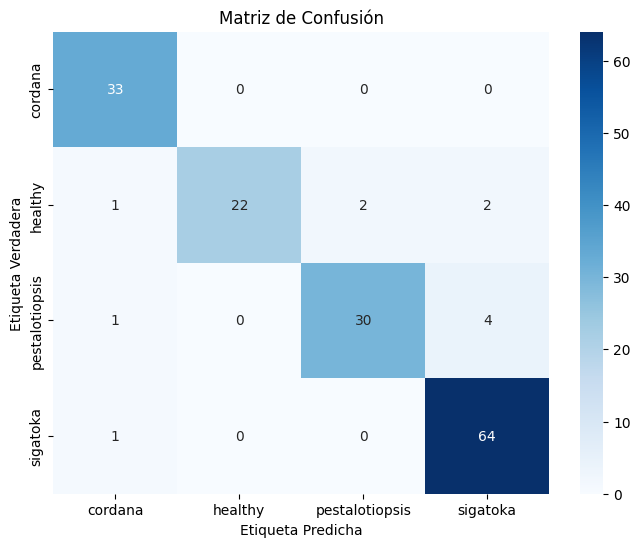

                precision    recall  f1-score   support

       cordana       0.92      1.00      0.96        33
       healthy       1.00      0.81      0.90        27
pestalotiopsis       0.94      0.86      0.90        35
      sigatoka       0.91      0.98      0.95        65

      accuracy                           0.93       160
     macro avg       0.94      0.91      0.92       160
  weighted avg       0.93      0.93      0.93       160



In [7]:
# Obtener las predicciones y etiquetas verdaderas
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes[:len(predicted_classes)]
class_labels = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


### Clases:
- **cordana**: Enfermedad Cordana
- **healthy**: Hojas sanas
- **pestalotiopsis**: Enfermedad Pestalotiopsis
- **sigatoka**: Enfermedad Sigatoka

### Análisis de Resultados:

- **Clase Cordana**: 
  - 33 imágenes fueron correctamente clasificadas como **Cordana**.
  - No se produjeron falsas clasificaciones de Cordana como otra clase.

- **Clase Healthy (Saludable)**:
  - 22 imágenes fueron correctamente clasificadas como **Healthy**.
  - 1 imagen de **Healthy** fue mal clasificada como **Cordana**.
  - 2 imágenes de **Healthy** fueron mal clasificadas como **Pestalotiopsis**.
  - 2 imágenes de **Healthy** fueron mal clasificadas como **Sigatoka**.

- **Clase Pestalotiopsis**:
  - 30 imágenes fueron correctamente clasificadas como **Pestalotiopsis**.
  - 1 imagen de **Pestalotiopsis** fue incorrectamente clasificada como **Cordana**.
  - 4 imágenes de **Pestalotiopsis** fueron mal clasificadas como **Sigatoka**.

- **Clase Sigatoka**:
  - 64 imágenes fueron correctamente clasificadas como **Sigatoka**.
  - 1 imagen de **Sigatoka** fue mal clasificada como **Cordana**.

### Conclusión:
El modelo **MobileNetV2** presenta un buen rendimiento general, especialmente en las clases **Cordana** y **Sigatoka**, donde las tasas de acierto son bastante altas. Sin embargo, la clase **Healthy** presenta algunos problemas de confusión, en especial con las clases **Pestalotiopsis** y **Sigatoka**.
